In [ ]:
from IPython.display import Image

In [ ]:
!pip install ultralytics==8.0.196
!pip install roboflow

In [ ]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [ ]:

rf = Roboflow(api_key="zTAAscQytlrDZEn8m3ZE")
project = rf.workspace("fire-and-smoke-alkqh").project("fire-and-smoke-dgvbp")
version = project.version(3)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/Fire-and-smoke-3/data.yaml epochs=1 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Fire-and-smoke-3/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fa

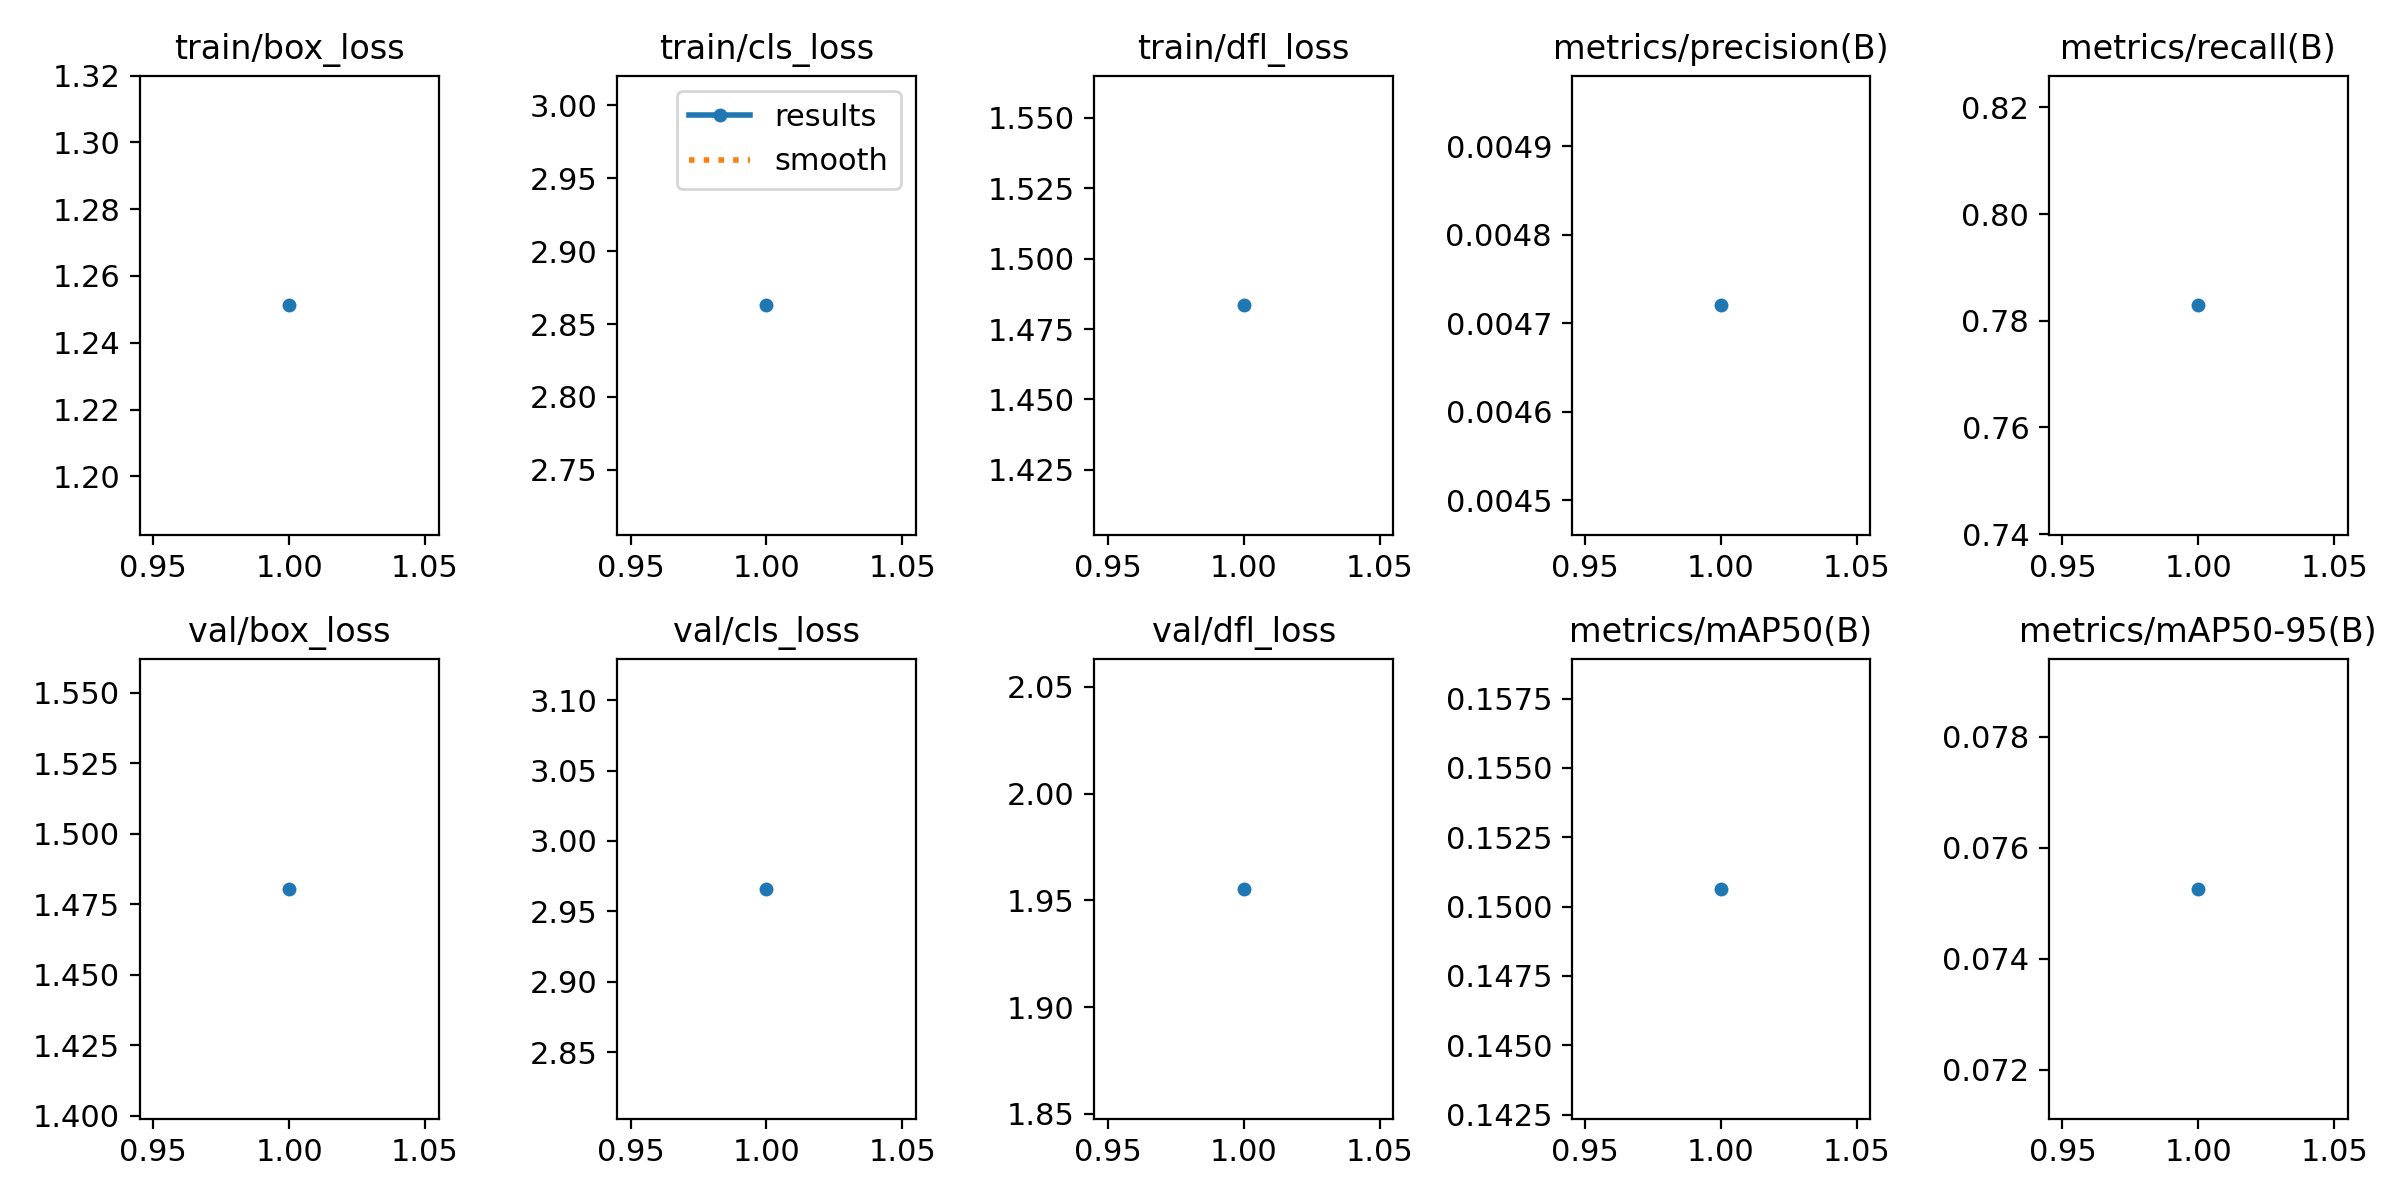

In [ ]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Fire-and-smoke-3/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Fire-and-smoke-3/valid/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100% 485/485 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:09<00:00,  3.10it/s]
                   all        485        890    0.00473      0.785      0.151     0.0753
                  Fire        485        507    0.00482       0.71      0.108     0.0498
                 Smoke        485        383    0.00465      0.859      0.193      0.101
Speed: 0.8ms preprocess, 5.4ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val
